In [1]:
# from utils import * 

import os
os.chdir("../../scVI/")
os.getcwd()

import pickle
import numpy as np
import pandas as pd
from copy import deepcopy 

save_path = '../CSF/Notebooks/'

In [2]:
celllabels = np.load(save_path + 'meta/celllabels.npy')
celltypes, labels = np.unique(celllabels,return_inverse=True)

In [3]:
# from numpy import savetxt
# savetxt('../CSF/DE/raw/celllables.csv', celllabels.astype(str), delimiter=',',fmt='%s')

In [4]:
# with open(save_path + 'posterior/all_datasets.vae.full.pkl', 'rb') as f:
#     full = pickle.load(f)

In [5]:
# DEres, DEclust = full.one_vs_all_degenes(cell_labels=labels, output_file=False,save_dir=save_path, filename='LouvainClusters')

In [6]:
# with open(save_path + 'DE/allclust.DEres.pkl', 'wb') as f:
#     pickle.dump((DEres,DEclust),f)

In [7]:
with open(save_path + 'DE/allclust.DEres.pkl', 'rb') as f:
    DEres,DEclust = pickle.load(f)

genenames = pd.read_csv('../CSF/RFiles/genenames.csv',header=None)

In [8]:
clean = [1,2,3,4,5,6,7,8,10,11,13,14,17,18,19,20,21]
temp=[x in clean for x in DEclust]
DEres = [DEres[i] for i,x in enumerate(temp) if x is True]
DEclust = [DEclust[i] for i,x in enumerate(temp) if x is True]

In [10]:
from statsmodels.stats.multitest import multipletests

In [12]:
celltype = []
combinedDEres = []
for i,x in enumerate(celltypes[DEclust]):
    temp  = pd.read_csv('../CSF/DE/wilcoxon/MannWhitneyU.norm.allclusters.%s.csv'%x)
    temp.index = list(genenames[0])
    fdr_wil = multipletests(temp['pvalue'],method='fdr_bh')
    temp = pd.concat([temp,DEres[i]],axis=1,sort=True)
    temp = temp.sort_values(by='bayes1',ascending=False)
    combined = deepcopy(temp[['stat','pvalue','bayes1','bayes2','mean1','mean2','nonz1','nonz2','clusters',]])
    combined['scVI_logFC'] = np.log(temp['scale1']/temp['scale2'])
    combined['norm_logFC'] = np.log(temp['norm_mean1']/temp['norm_mean2'])
    temp  = pd.read_csv('../CSF/EdgeR/allcluster.batchcorrected.%s.edgeR.csv'%x)
    fdr_edgeR = multipletests(temp['PValue'],method='fdr_bh')
    temp.index = list(genenames[0])
    temp = temp[['logFC','logCPM','F','PValue']]
    combined = pd.concat([combined,temp],axis=1,sort=True)
    combined['fdr_wil'] = fdr_wil[1]
    combined['fdr_edgeR'] = fdr_edgeR[1]
    celltype.append(x)
    combinedDEres.append(combined)



/data/yosef2/users/chenling/miniconda3/envs/pytorch_new/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


# Genes specific to ncMono in CSF

In [169]:
np.where(np.asarray(celltype)=='ncMono')

(array([14]),)

In [173]:
combinedDEres[14].loc[['CD9', 'CD163', 'EGR1', 'BTG2', 'C1QA', 'C1QB', 'MAF', 'CSF1R','LYVE1',
                       'TREM2', 'TMEM119', 'GPR34','STAB1',' MRC1', 'CH25H']]

/data/yosef2/users/chenling/miniconda3/envs/pytorch_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
CD9,42142966.0,1.436891e-05,3.360764,-3.361449,0.857143,0.052478,0.371287,0.030855,19.0,1.653688,2.254728,1.875177,9.260879,6124.581449,0.000000e+00,7.385333e-111,4.081184e-21
CD163,31711418.0,3.028527e-82,2.384372,-2.397095,0.326025,0.030401,0.242574,0.025253,19.0,1.698909,2.098890,1.087243,9.240138,3437.478125,1.768930e-144,0.000000e+00,4.536276e-03
EGR1,44009628.0,9.357266e-02,1.631642,-1.624514,1.024752,0.116019,0.415842,0.066028,19.0,0.992331,1.726115,1.150460,9.307898,1523.005220,4.603739e-162,0.000000e+00,5.994029e-08
BTG2,54677328.0,1.010938e-41,1.474527,-1.466519,1.693069,0.386672,0.614569,0.243100,19.0,0.500336,0.971417,0.627618,9.480026,303.979701,6.380172e-68,3.037020e-138,7.121976e-07
C1QA,79379399.0,0.000000e+00,4.492181,-4.521518,8.275106,0.077748,0.851485,0.018213,19.0,2.937284,4.809092,3.913062,9.365987,48353.714862,0.000000e+00,0.000000e+00,6.279917e-04
C1QB,78346225.0,0.000000e+00,4.516310,-4.527278,9.534653,0.068641,0.838048,0.013221,19.0,2.924873,5.129160,4.069154,9.375361,69268.001533,0.000000e+00,0.000000e+00,1.973194e-01
MAF,45120770.0,9.261500e-01,1.065639,-1.069344,0.786421,0.070722,0.419378,0.060176,19.0,0.843811,1.973892,1.381075,9.274521,2421.062477,1.113606e-232,4.461243e-04,3.811636e-03
CSF1R,59119071.0,8.224849e-88,3.578011,-3.616753,1.061528,0.054293,0.589109,0.038287,19.0,2.165655,2.910154,1.826649,9.263347,7695.768080,0.000000e+00,0.000000e+00,1.940601e-01
LYVE1,46753222.0,2.543727e-02,3.640566,-3.660148,1.090523,0.006697,0.424328,0.003223,19.0,2.682799,5.375193,2.524788,9.234937,22780.004085,0.000000e+00,0.000000e+00,5.423635e-01
TREM2,62574333.0,1.124790e-135,4.512680,-4.504431,1.659123,0.013284,0.611033,0.007526,19.0,2.776798,4.957774,2.661518,9.245552,35078.703677,0.000000e+00,0.000000e+00,9.396947e-05


In [13]:
from pandas import ExcelWriter
import xlsxwriter


writer = pd.ExcelWriter(save_path + 'DE/allclusters.xlsx', engine='xlsxwriter')
for i, x in enumerate(celltype):
    combinedDEres[i].to_excel(writer, sheet_name=str(x))
writer.close()


In [23]:
temp = pd.concat(combinedDEres)

In [32]:
x = temp.loc['CD3E']
x.loc[(x['fdr_wil']<0.2)&(x['fdr_edgeR']<0.2)& 
                  (x['bayes1']>0.3) &
                  (x['logFC']>0) & (x['norm_logFC']>0)]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
CD3E,698474228.0,0.000000e+00,0.686205,-0.683288,1.453814,0.749658,0.745150,0.382039,3,0.418806,0.574413,0.715747,9.813061,3128.466498,0.000000e+00,5.257386e-13,3.015119e-08
CD3E,361718089.0,0.000000e+00,2.123328,-2.127760,1.397711,0.951643,0.719602,0.485581,4,0.533828,0.628724,0.615667,9.813060,1336.847290,9.553313e-290,3.581819e-10,6.393136e-12
CD3E,121252012.0,2.563210e-199,0.541428,-0.533027,1.723666,0.987308,0.795144,0.508766,5,0.266667,0.406310,0.584672,9.813056,462.187130,3.637274e-102,5.134992e-05,6.372646e-04
CD3E,48909859.0,3.037460e-48,0.829425,-0.839216,1.470684,1.011638,0.751629,0.517177,13,0.310676,0.419611,0.544118,9.813051,162.400479,3.745311e-37,4.656268e-15,8.408956e-05
CD3E,125515623.0,4.280000e-110,0.635760,-0.626373,1.557920,0.991763,0.742475,0.509873,14,0.290869,0.379966,0.531799,9.813054,412.726119,1.794613e-91,1.387020e-12,1.303869e-19


In [111]:
filtered = [x.loc[(x['fdr_wil']<0.05)&(x['fdr_edgeR']<0.05)& 
                  (x['bayes1']>0.5) &
                  (x['logFC']>0) & (x['norm_logFC']>0)] for x in combinedDEres]

DEgenes = pd.concat(filtered)

DEgenes['clusters'] = np.asarray(celltypes)[np.asarray(DEgenes['clusters']).astype(int)]
DEgenes.to_csv(save_path+'DE/clustermarkers.csv')

In [137]:
filtered = [x.loc[(x['fdr_wil']<0.2)&(x['fdr_edgeR']<0.2)& 
                  (x['bayes1']>0.3) &
                  (x['logFC']>0) & (x['norm_logFC']>0)] for x in combinedDEres]

DEgenes = pd.concat(filtered)
DEgenes['clusters'] = np.asarray(celltypes)[np.asarray(DEgenes['clusters']).astype(int)]
DEgenes.to_csv(save_path+'DE/clustermarkers.relaxed.csv')

In [138]:
DEgenes.loc['CD3E']

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
CD3E,698474228.0,0.000000e+00,0.686205,-0.683288,1.453814,0.749658,0.745150,0.382039,CD4,0.418806,0.574413,0.715747,9.813061,3128.466498,0.000000e+00,5.257386e-13,3.015119e-08
CD3E,361718089.0,0.000000e+00,2.123328,-2.127760,1.397711,0.951643,0.719602,0.485581,CD8a,0.533828,0.628724,0.615667,9.813060,1336.847290,9.553313e-290,3.581819e-10,6.393136e-12
CD3E,121252012.0,2.563210e-199,0.541428,-0.533027,1.723666,0.987308,0.795144,0.508766,CD8n,0.266667,0.406310,0.584672,9.813056,462.187130,3.637274e-102,5.134992e-05,6.372646e-04
CD3E,48909859.0,3.037460e-48,0.829425,-0.839216,1.470684,1.011638,0.751629,0.517177,Tdg,0.310676,0.419611,0.544118,9.813051,162.400479,3.745311e-37,4.656268e-15,8.408956e-05
CD3E,125515623.0,4.280000e-110,0.635760,-0.626373,1.557920,0.991763,0.742475,0.509873,Tregs,0.290869,0.379966,0.531799,9.813054,412.726119,1.794613e-91,1.387020e-12,1.303869e-19


# Finding shared DE genes

In [139]:
CD4 = np.asarray([x in ['CD4','Tdg','Tregs'] for x in DEgenes['clusters']])

In [140]:
names, occ = np.unique(DEgenes.loc[CD4].index,return_counts=True)

In [141]:
names[occ==3]

array(['ACP6', 'ATF7IP2', 'CCDC66', 'CD3E', 'CDC37L1', 'CTD-2035E11.3',
       'DDX24', 'DUSP16', 'GATA3', 'HIST1H2AG', 'HNRNPA1L2', 'HNRNPUL1',
       'IL23A', 'LTBP4', 'MT-ND6', 'NOL4L', 'NOL9', 'NT5DC1', 'NUDT15',
       'PA2G4', 'PBX4', 'PDE3B', 'PLEKHN1', 'POLR3E', 'PTMA', 'RCL1',
       'RIC8B', 'RP11-285F7.2', 'RP11-841O20.2', 'RP13-580F15.2', 'SGF29',
       'SNAI3', 'SPTAN1', 'TRAPPC6A', 'TRIM47', 'TTC39C-AS1', 'WDR43',
       'ZNHIT3'], dtype=object)

In [162]:
CDab = np.asarray([x in ['CD4','Tdg','Tregs','CD8a','CD8n'] for x in DEgenes['clusters']])

In [166]:
names, occ = np.unique(DEgenes.loc[CDab].index,return_counts=True)
names[occ>=4]

array(['AAK1', 'ADAL', 'AP4S1', 'ATF7IP2', 'ATP6V0E2', 'C12orf43',
       'CCDC66', 'CCT7', 'CD3E', 'CDC37L1', 'CDKN2AIP', 'CLEC2D', 'COG1',
       'CTC-260E6.6', 'CTD-2035E11.3', 'DDX24', 'ENOSF1', 'FAM162A',
       'FASTKD2', 'FBXO32', 'FXN', 'GATA3', 'GIMAP5', 'HNRNPA1L2',
       'IL23A', 'ITPKB', 'LINC00861', 'LINC00954', 'LINC01137', 'LTBP4',
       'MAD2L1', 'MPI', 'MRPL1', 'MRPL46', 'MT-ND6', 'NOL9', 'NOLC1',
       'NOP14', 'NOP58', 'NT5DC1', 'PA2G4', 'PBX4', 'PCNT', 'PHLDB3',
       'PIGK', 'POLR3E', 'PPIAL4G', 'PPWD1', 'RIC8B', 'RNF216',
       'RP11-285F7.2', 'RP11-51J9.5', 'RP11-902B17.1', 'RP13-580F15.2',
       'RP5-827C21.4', 'RPS26', 'RRP1B', 'RWDD2A', 'SEPT1', 'SEPT6',
       'SGF29', 'SPTAN1', 'STX17', 'THYN1', 'TMEM161B', 'TRAF3IP3',
       'TRAJ16', 'TRAPPC6A', 'TTPAL', 'WDR43', 'YBEY', 'ZNF766', 'ZNF91',
       'ZNHIT3'], dtype=object)

In [142]:
DEgenes.loc[['CD8B','CCL5']]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
CD8B,437483632.0,0.000000e+00,2.634690,-2.652167,1.107662,0.172697,0.533731,0.082441,CD8a,1.209929,2.210984,2.269157,9.431599,18402.995988,0.000000e+00,6.143255e-242,7.963794e-02
CD8B,155233460.0,0.000000e+00,2.439783,-2.440612,1.881669,0.243197,0.796854,0.121647,CD8n,1.070045,1.826926,2.401935,9.431653,9257.918601,0.000000e+00,9.495145e-07,1.508754e-03
CCL5,522682755.0,0.000000e+00,3.245193,-3.249975,10.534229,1.398527,0.987562,0.280194,CD8a,1.787812,2.109153,3.019795,10.548310,27552.439797,0.000000e+00,1.102062e-136,1.522563e-07
CCL5,6650772.0,1.269633e-49,4.049777,-4.066075,12.672566,2.786898,1.000000,0.387959,MegaK,1.899150,2.179247,1.863108,10.549380,137.765869,8.825904e-32,1.503010e-30,1.425856e-04
CCL5,63673068.0,4.789954e-302,1.477829,-1.487186,7.197068,2.719835,0.954397,0.378187,Tdg,0.836666,0.862127,1.442967,10.549541,706.621499,7.283478e-155,2.979502e-02,4.722999e-08


In [143]:
DEgenes.loc[['FOXP3']]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
FOXP3,93973764.0,2.269835e-14,2.504007,-2.501385,0.066282,0.002305,0.05716,0.002128,Tregs,1.913861,3.407608,0.576922,9.219772,20927.254331,9.348193e-168,1.228385e-31,0.011222


In [144]:
DEgenes.loc[['CTLA4']]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
CTLA4,92186094.0,1.053455e-20,2.644696,-2.638075,0.048039,0.006351,0.043478,0.005884,Tregs,1.227280,2.172858,0.350590,9.221608,4316.469229,1.005047e-53,2.274087e-07,6.632030e-40
CTLA4,492626.0,5.663275e-40,0.836527,-0.838029,0.058140,0.008384,0.058140,0.007710,mDC1,0.149353,0.990859,0.089783,9.221606,6.101587,4.932492e-01,1.263065e-40,2.032258e-10
CTLA4,14738220.0,0.000000e+00,0.822578,-0.826353,0.027581,0.008027,0.019095,0.007526,ncMono,0.537259,0.611066,0.058940,9.221609,58.211883,2.303368e-02,0.000000e+00,1.146223e-247


In [145]:
DEgenes.loc[['TRDC']]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
TRDC,337171774.0,8.676851e-256,2.145823,-2.135848,0.295721,0.186157,0.088657,0.074788,CD8a,1.039540,0.494161,0.652631,9.365378,937.597186,1.857388e-204,0.000000,9.776444e-179
TRDC,191951271.0,0.000000e+00,2.092274,-2.090457,1.393267,0.130669,0.644937,0.042398,NK1,0.940890,2.591380,2.867740,9.365245,15593.074716,0.000000e+00,0.000000,0.000000e+00
TRDC,51430920.0,5.620816e-76,3.084262,-3.090653,1.565147,0.176917,0.378664,0.071141,Tdg,1.293099,2.016883,2.421544,9.365684,4119.369575,0.000000e+00,0.038359,7.865108e-07


In [146]:
DEgenes.loc[['NKG7']]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
NKG7,485637664.0,0.000000e+00,2.340728,-2.319278,7.315124,1.645253,0.884776,0.181200,CD8a,1.486268,1.484086,2.788661,10.475716,15406.722423,0.000000e+00,1.587396e-230,0.026627
NKG7,223861663.0,0.000000e+00,4.929560,-4.918704,17.529522,1.605102,0.999199,0.246302,NK1,2.361947,2.590449,3.738996,10.474996,19080.173276,0.000000e+00,4.487495e-43,0.000053
NKG7,36349616.0,8.934526e-191,1.603091,-1.608718,10.266568,2.436138,0.876289,0.283277,NK2,1.223067,1.148421,2.273153,10.477334,982.990138,3.510550e-214,5.696544e-13,0.153528


In [147]:
DEgenes.loc[['FCGR3A']]


,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
FCGR3A,338317409.0,1.152869e-265,0.975092,-0.974087,0.268259,0.332712,0.164478,0.107931,CD8a,0.137229,0.124178,0.531065,9.428405,496.514522,1.641785e-78,5.591582e-136,0.020898
FCGR3A,48064875.0,0.000000e+00,4.510095,-4.528329,8.557419,0.223931,0.963871,0.106458,Mono,2.697799,3.015784,3.592968,9.428369,11138.801918,0.000000e+00,3.128608e-169,0.003401
FCGR3A,204999043.0,0.000000e+00,3.377168,-3.396660,1.872829,0.228586,0.786535,0.075914,NK1,1.885649,2.756290,2.977007,9.428435,18855.241405,0.000000e+00,3.578643e-22,0.001962
FCGR3A,56616918.0,1.030230e-59,2.099110,-2.102141,1.444130,0.297988,0.591231,0.106130,ncMono,1.002902,0.977095,1.907641,9.428370,2596.188858,0.000000e+00,1.047692e-235,0.058628


In [148]:
DEgenes.loc[['PRF1']]


,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
PRF1,220229564.0,0.000000e+00,5.826777,-5.800578,3.773978,0.184402,0.917980,0.109381,NK1,2.689423,3.243398,3.778468,9.491689,41217.706062,0.000000e+00,5.548729e-40,0.000017
PRF1,30486751.0,2.504732e-68,1.704847,-1.715513,1.363770,0.379847,0.553756,0.151531,NK2,0.945760,0.906836,1.432210,9.492472,552.604767,1.095935e-121,7.560569e-16,0.160859


In [149]:
DEgenes.loc[['XCL1']]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
XCL1,344700667.0,0.000000e+00,1.681015,-1.681015,0.048060,0.028005,0.038806,0.016499,CD8a,0.694897,0.575165,0.198916,9.239452,476.662242,5.648196e-24,1.424593e-250,3.945092e-05
XCL1,138219255.0,2.054786e-93,1.679378,-1.682401,0.108202,0.026403,0.078279,0.016384,NK1,1.234042,1.576144,0.856537,9.239432,3883.258113,1.915489e-181,1.622578e-46,7.679689e-09
XCL1,29468676.0,2.047591e-53,2.780972,-2.791025,1.181149,0.019011,0.540501,0.014463,NK2,2.565661,4.091644,3.257712,9.239497,26251.394703,0.000000e+00,1.320887e-14,1.611422e-01


In [150]:
temp = [x for x in combinedDEres[0].index if x.startswith('IGH')]

In [151]:
DEgenes.loc[temp[:9]]

/data/yosef2/users/chenling/miniconda3/envs/pytorch_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
IGHA1,52344000.0,9.549244e-107,5.609369,-5.509118,1.493703,0.983114,0.458438,0.029173,B2,2.315305,1.803511,2.383242,9.634248,4624.932742,1.871366e-56,2.577115e-19,1.706245e-03
IGHA1,7910850.0,1.968734e-48,8.842402,-8.842402,430.014085,0.057821,0.852113,0.035223,plasma,5.745830,7.351920,9.410573,9.635864,87286.211797,0.000000e+00,1.132667e-09,3.179961e-40
IGHA2,38751595.0,3.858431e-01,5.088775,-5.073385,0.270361,0.123833,0.137699,0.002386,B2,2.226221,2.164400,0.990965,9.281474,2360.787901,1.987416e-32,2.659103e-22,1.645928e-01
IGHA2,4839815.0,3.455228e-01,9.267298,-9.156073,55.274648,0.006367,0.514085,0.003743,plasma,5.676807,7.663614,7.666019,9.281751,122278.729501,0.000000e+00,1.053338e-63,1.141144e-04
IGHD,163033315.0,0.000000e+00,5.717303,-5.828675,2.659488,0.029952,0.864092,0.011384,B1,2.770103,5.123406,4.351818,9.314952,116347.259853,0.000000e+00,1.559040e-125,7.076900e-05
IGHD,42039246.0,2.438947e-09,3.138141,-3.117555,0.596977,0.129836,0.244332,0.042863,B2,1.847436,1.276913,1.310927,9.314997,1219.504467,9.674466e-182,2.719171e-25,6.597548e-04
IGHD,725346.0,1.055526e-67,3.882789,-3.883070,1.859155,0.134604,0.049296,0.046530,plasma,2.430887,0.588444,3.313246,9.314952,2047.503584,0.000000e+00,1.696000e-02,9.108445e-04
IGHG1,6135636.0,1.868438e-11,9.009466,-9.104779,218.464789,0.027829,0.647887,0.014896,plasma,5.586400,7.321530,8.999979,9.456428,94113.770529,0.000000e+00,2.450100e-60,1.514324e-23
IGHG2,116463278.0,1.885355e-246,2.672944,-2.688870,0.017453,0.040761,0.017081,0.005237,B1,0.767822,0.681766,0.343738,9.237300,571.741015,6.420761e-02,8.647747e-220,1.231122e-01
IGHG2,5178892.0,1.413422e-02,8.545118,-8.489540,15.591549,0.005922,0.542254,0.004556,plasma,5.150057,6.358379,5.851371,9.237301,50635.522730,0.000000e+00,1.709218e-45,3.617311e-02


In [152]:
DEgenes.loc[['CD37']]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
CD37,68726371.0,0.000000e+00,3.294156,-3.257577,6.313182,1.730256,0.988245,0.717752,B2,1.150198,1.232452,1.676354,10.130881,3214.051748,0.000000e+00,1.202007e-19,0.190019
CD37,36711342.0,2.783008e-111,1.667142,-1.688339,3.963871,1.787997,0.953548,0.719911,Mono,0.217422,0.358685,0.420528,10.130960,96.965976,7.316389e-23,5.611050e-221,0.000077


In [153]:
DEgenes.loc[['IGHD']]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
IGHD,163033315.0,0.000000e+00,5.717303,-5.828675,2.659488,0.029952,0.864092,0.011384,B1,2.770103,5.123406,4.351818,9.314952,116347.259853,0.000000e+00,1.559040e-125,0.000071
IGHD,42039246.0,2.438947e-09,3.138141,-3.117555,0.596977,0.129836,0.244332,0.042863,B2,1.847436,1.276913,1.310927,9.314997,1219.504467,9.674466e-182,2.719171e-25,0.000660
IGHD,725346.0,1.055526e-67,3.882789,-3.883070,1.859155,0.134604,0.049296,0.046530,plasma,2.430887,0.588444,3.313246,9.314952,2047.503584,0.000000e+00,1.696000e-02,0.000911


In [154]:
DEgenes.loc[['IGHG1','CD38','TNFRSF17']]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
IGHG1,6135636.0,1.868438e-11,9.009466,-9.104779,218.464789,0.027829,0.647887,0.014896,plasma,5.586400,7.321530,8.999979,9.456428,94113.770529,0.000000e+00,2.450100e-60,1.514324e-23
CD38,115067154.0,1.118319e-225,2.022496,-2.025568,0.036019,0.033656,0.032306,0.022752,B1,0.572492,0.530244,0.237775,9.237721,234.003303,3.210114e-08,1.307194e-224,5.542663e-03
CD38,20590526.0,5.499199e-03,2.465441,-2.488602,0.131075,0.032732,0.108984,0.022244,NK2,1.172515,1.347362,0.520908,9.237689,369.105122,2.001314e-15,5.755625e-16,7.560580e-02
CD38,7843676.0,1.528346e-46,5.566013,-5.542869,4.267606,0.024531,0.838028,0.021370,plasma,3.164827,3.410142,3.436683,9.237721,5214.599187,0.000000e+00,5.071805e-78,2.364297e-02
TNFRSF17,118635020.0,1.351650e-280,3.550627,-3.571099,0.058671,0.029234,0.051987,0.005444,B1,1.355193,2.315367,0.738048,9.231680,6856.091790,1.002430e-72,1.764039e-183,8.036361e-02
TNFRSF17,35307816.0,7.704091e-06,3.982075,-3.950711,0.081444,0.029500,0.070529,0.006190,B2,1.582383,1.959617,0.414603,9.231616,1751.790812,7.618106e-18,1.141167e-16,4.218128e-02
TNFRSF17,5789201.0,1.371178e-49,5.011523,-5.000595,0.253731,0.029296,0.188060,0.006432,pDC,2.143935,2.713830,0.457983,9.231599,860.633055,8.247246e-17,1.451275e-81,1.653129e-01
TNFRSF17,8565111.0,7.242767e-69,8.634742,-8.842402,11.126761,0.006275,0.915493,0.005385,plasma,4.635885,5.812883,5.164440,9.231681,34816.398708,0.000000e+00,6.723831e-60,3.656258e-09


In [155]:
DEgenes.loc[['LYZ']]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
LYZ,368407493.0,0.000000e+00,6.201529,-6.336887,48.442737,1.499890,1.000000,0.160270,Gran,3.587001,3.964062,5.408912,11.113573,120984.786144,0.000000e+00,4.271966e-163,7.307635e-38
LYZ,5047222.0,1.144662e-37,1.943778,-1.938060,27.779070,6.007710,1.000000,0.240420,mDC1,0.884472,0.542656,0.425784,11.107105,4.487716,3.414303e-02,6.243917e-46,1.124809e-01
LYZ,51896320.0,1.272981e-274,2.039455,-2.070808,29.028836,5.689457,0.916581,0.231233,mDC2,1.197298,0.875452,0.785634,11.107624,121.003399,4.038146e-28,0.000000e+00,2.645301e-02


In [156]:
DEgenes.loc[['WDFY4', 'XCR1', 'BATF3']]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
WDFY4,117896046.0,9.984562e-269,3.268059,-3.258823,0.056071,0.015088,0.054957,0.012374,B1,1.564706,2.047285,0.584270,9.226463,4577.716780,1.766989e-77,2.684715e-219,4.284962e-03
WDFY4,35912479.0,4.069006e-04,4.061059,-4.020173,0.104114,0.015156,0.097397,0.012583,B2,1.850563,2.224629,0.672168,9.226445,3080.712651,8.328921e-59,4.866902e-14,4.249220e-04
WDFY4,140626396.0,1.961540e-225,1.852516,-1.856361,0.026612,0.015725,0.025503,0.012912,Gran,0.557716,0.786481,0.031727,9.226572,150.458702,1.504551e-05,2.035620e-295,1.016408e-34
WDFY4,11659596.0,3.452660e-247,2.936398,-2.939421,0.127703,0.015104,0.108136,0.012711,mDC2,1.554551,1.551353,0.259840,9.226445,308.965732,3.153239e-15,0.000000e+00,3.444149e-06
WDFY4,18042764.0,0.000000e+00,2.025676,-2.003578,0.066478,0.015678,0.065064,0.013002,ncMono,0.765059,1.289506,0.165919,9.226452,322.637877,8.874688e-09,0.000000e+00,7.318214e-05
WDFY4,6743097.0,2.363274e-33,5.351923,-5.365025,0.283582,0.015402,0.238806,0.012971,pDC,2.372821,2.705004,0.993208,9.226440,1593.978828,2.424894e-46,1.146513e-133,4.138459e-02
XCR1,4488941.0,5.775179e-22,10.713946,-11.001483,2.174419,0.000291,0.790698,0.000184,mDC1,5.815361,8.649158,3.380990,9.217432,70569.019642,9.193241e-293,5.273367e-46,1.398360e-01
BATF3,139638593.0,3.335548e-235,2.707197,-2.708429,0.026453,0.018047,0.024077,0.013590,Gran,1.009853,0.788375,0.009837,9.227453,251.670349,2.871831e-08,1.086396e-274,1.669991e-15
BATF3,19519753.0,7.073132e-90,4.061059,-4.032757,0.317199,0.014358,0.246138,0.011110,mDC2,2.176432,2.883210,0.884838,9.227254,3314.539220,2.334784e-103,0.000000e+00,6.533064e-03
BATF3,19682873.0,1.858661e-289,2.596717,-2.593279,0.096888,0.017133,0.086280,0.013018,ncMono,1.445974,1.788052,0.214401,9.227265,484.440137,2.604791e-12,0.000000e+00,1.407830e-02


In [157]:
DEgenes.loc[['FCER1A', 'CD1C', 'CLEC10A']]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
FCER1A,57981929.0,0.000000e+00,5.404138,-5.443532,8.602472,0.062854,0.921730,0.016502,mDC2,3.407778,4.874188,3.916865,9.321927,56252.928717,0.000000e+00,1.492141e-230,0.015329
CD1C,115469522.0,1.432630e-231,2.596889,-2.587628,0.050501,0.086328,0.043817,0.025290,B1,1.325006,0.340430,0.795917,9.265579,1123.883011,5.454702e-32,4.015389e-229,0.000012
CD1C,37210226.0,1.277360e-01,2.879691,-2.860760,0.192275,0.082856,0.126784,0.024183,B2,1.597282,1.344376,0.881376,9.265437,1641.064956,3.795346e-52,1.190373e-17,0.176762
CD1C,49028683.0,3.361873e-204,5.248526,-5.237899,3.527291,0.032911,0.760041,0.014979,mDC2,3.213419,4.551455,3.211490,9.265442,36912.852011,0.000000e+00,0.000000e+00,0.000471
CLEC10A,154008927.0,1.204402e-113,2.420507,-2.434372,0.201806,0.127548,0.087914,0.033518,Gran,1.555750,0.766032,0.420587,9.294672,1670.373786,1.460148e-169,9.198126e-258,0.000067
CLEC10A,54931802.0,0.000000e+00,5.503601,-5.645132,4.766220,0.064843,0.872297,0.026198,mDC2,3.167863,4.191297,3.060401,9.293086,28439.871127,0.000000e+00,0.000000e+00,0.000573


In [158]:
DEgenes.loc[['S100A8', 'S100A9', 'TSPO']]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
S100A8,365360632.0,0.000000e+00,5.982296,-5.903577,56.990971,0.740989,0.983526,0.136919,Gran,4.374930,4.741872,5.788314,11.237683,157596.457708,0.000000e+00,3.269679e-300,8.187727e-42
S100A9,367405675.0,0.000000e+00,6.137544,-6.117091,87.214003,1.152407,0.990179,0.178249,Gran,4.328523,4.739373,5.877296,11.689046,174182.596928,0.000000e+00,0.000000e+00,0.000000e+00
TSPO,342448355.0,0.000000e+00,6.027562,-5.956084,4.568668,0.744988,0.953429,0.429397,Gran,1.733876,1.879095,2.271308,9.833243,21866.239499,0.000000e+00,1.009502e-284,4.239127e-18
TSPO,42909599.0,5.469699e-89,1.641540,-1.655791,3.353244,1.080724,0.810505,0.475052,mDC2,0.496595,0.390545,0.061566,9.831190,1.594129,2.067418e-01,0.000000e+00,8.904915e-10
TSPO,65005986.0,1.145561e-175,1.973211,-1.983412,2.751061,1.078295,0.866337,0.471492,ncMono,0.736493,0.509655,0.719505,9.831305,366.561284,1.756253e-81,0.000000e+00,1.568304e-04


In [159]:
DEgenes.loc[['CD14','FCGR3A']]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
CD14,346743610.0,0.000000e+00,4.579526,-4.578421,3.575638,0.182706,0.885316,0.052819,Gran,2.971994,3.398196,3.789810,9.526624,62476.767633,0.000000e+00,2.424731e-207,0.039155
CD14,78457356.0,0.000000e+00,2.500989,-2.512866,4.258133,0.427682,0.879774,0.116754,ncMono,1.856768,1.946731,2.933072,9.524844,7343.174393,0.000000e+00,0.000000e+00,0.002584
FCGR3A,338317409.0,1.152869e-265,0.975092,-0.974087,0.268259,0.332712,0.164478,0.107931,CD8a,0.137229,0.124178,0.531065,9.428405,496.514522,1.641785e-78,5.591582e-136,0.020898
FCGR3A,48064875.0,0.000000e+00,4.510095,-4.528329,8.557419,0.223931,0.963871,0.106458,Mono,2.697799,3.015784,3.592968,9.428369,11138.801918,0.000000e+00,3.128608e-169,0.003401
FCGR3A,204999043.0,0.000000e+00,3.377168,-3.396660,1.872829,0.228586,0.786535,0.075914,NK1,1.885649,2.756290,2.977007,9.428435,18855.241405,0.000000e+00,3.578643e-22,0.001962
FCGR3A,56616918.0,1.030230e-59,2.099110,-2.102141,1.444130,0.297988,0.591231,0.106130,ncMono,1.002902,0.977095,1.907641,9.428370,2596.188858,0.000000e+00,1.047692e-235,0.058628


In [160]:
DEgenes.loc[['TCF4', 'JCHAIN']]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
TCF4,121910038.0,0.000000e+00,3.632790,-3.641682,0.244337,0.085418,0.206461,0.051714,B1,1.587274,1.710951,1.476167,9.275034,3983.262199,2.939533e-272,7.108918e-130,1.157800e-11
TCF4,47079420.0,3.292345e-43,3.916486,-3.925230,0.503778,0.084322,0.346767,0.052733,B2,1.712297,1.926327,1.579283,9.274954,3093.951172,5.225256e-261,3.722093e-29,2.188033e-09
TCF4,23605169.0,3.400109e-39,2.373633,-2.358264,0.509784,0.085665,0.338826,0.053858,mDC2,0.969110,1.327355,0.370070,9.274956,137.236383,2.258424e-26,0.000000e+00,2.408885e-35
TCF4,34361149.0,9.867227e-54,2.092501,-2.076913,0.404526,0.085054,0.287836,0.053010,ncMono,0.843597,1.312917,0.545216,9.274988,374.346301,1.230369e-39,0.000000e+00,2.519569e-33
TCF4,21108776.0,9.258872e-194,8.362766,-8.188375,4.686567,0.068286,0.964179,0.053423,pDC,3.596184,3.967140,3.773531,9.274933,13947.624410,0.000000e+00,6.994960e-113,3.312709e-03
TCF4,6161149.0,8.514786e-12,2.824354,-2.821731,1.535211,0.088825,0.661972,0.056778,plasma,1.351732,1.364436,0.180233,9.275035,7.859540,5.056814e-03,1.194593e-66,6.494253e-04
JCHAIN,131928635.0,0.000000e+00,3.416694,-3.433803,0.620869,0.624671,0.314519,0.028499,B1,1.269196,1.415756,2.460980,9.520246,4538.854610,1.704104e-267,1.130710e-134,6.074576e-02
JCHAIN,8992168.0,3.455062e-84,8.022816,-8.093041,219.704225,0.147260,0.971831,0.038261,plasma,5.206818,5.955032,7.254274,9.520260,28516.067251,0.000000e+00,9.526288e-63,3.303184e-12


In [161]:
DEgenes.loc[['GNG11', 'CLU']]

,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC,logFC,logCPM,F,PValue,fdr_wil,fdr_edgeR
GNG11,7367741.0,1.601872e-75,18.420681,-18.420681,19.548673,0.082162,1.000000,0.047721,MegaK,4.771973,6.334313,5.880606,9.296152,19105.483793,0.0,2.013062e-46,0.076718
CLU,7338854.0,2.266424e-74,12.098908,-11.001483,7.964602,0.044454,0.955752,0.031604,MegaK,4.832052,6.069914,5.045924,9.256999,12680.957388,0.0,1.430045e-44,0.027411


# older code

In [17]:
filtered = [x.loc[(x['pvalue']<0.05/10026) &
                  (x['bayes1']>3) &
                  (x['scVI_logFC']>0) & (x['norm_logFC']>0)] for x in combinedDEres]

DEgenes = pd.concat(filtered)
geneid, nocc = np.unique(DEgenes.index,return_counts=True)
shared = pd.DataFrame([geneid,nocc],index=['genename','occ']).T
shared = shared.sort_values(by='occ',ascending=False)

DEgenes['clusters'] = np.asarray(celltypes)[np.asarray(DEgenes['clusters']).astype(int)]


In [18]:
np.unique(DEgenes['clusters'],return_counts=True)

(array(['B1', 'B2', 'CD4', 'CD8a', 'CD8n', 'Gran', 'MegaK', 'Mono', 'NK1',
        'NK2', 'Tdg', 'Tregs', 'mDC1', 'mDC2', 'ncMono', 'pDC'],
       dtype=object),
 array([ 393,  207,    3,   12,    7, 1042, 1070,  482, 1351,   53,   11,
          10,  509,  287,  233, 1176]))

In [28]:
temp = [x for x in list(genenames[0]) if x.startswith('ITGA')]

In [29]:
DEgenes.loc[temp]

/data/yosef2/users/chenling/miniconda3/envs/pytorch_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,stat,pvalue,bayes1,bayes2,mean1,mean2,nonz1,nonz2,clusters,scVI_logFC,norm_logFC
ITGA6,129498196.0,4.757177e-37,3.946221,-3.970699,0.032861,0.038274,0.029655,0.036276,NK1,1.101944,0.290824
ITGA4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITGA1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITGA5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITGAL,142333697.0,4.055348e-129,3.737925,-3.714221,0.274379,0.118377,0.235907,0.106361,NK1,1.181498,1.245138
ITGAM,197678124.0,1.171140e-15,3.730612,-3.735482,0.345161,0.050192,0.274196,0.040483,Gran,1.987754,2.108623
ITGAX,19237881.0,1.807813e-28,4.052090,-4.012504,0.434839,0.046475,0.325161,0.038357,Mono,1.603757,1.975471
ITGAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITGA3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
DEgenes.to_csv(save_path + 'DE/allcluster.csv')

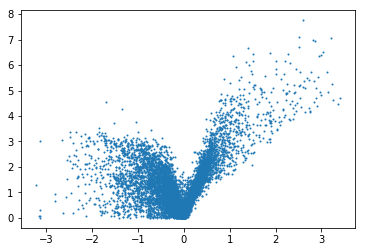

In [24]:
plt.scatter(y=np.abs(combined['bayes1']),x=combined['scVI_logFC'],s=1)

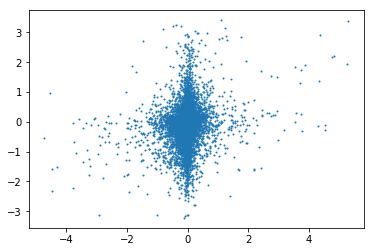

In [28]:
plt.scatter(x=combined['logFC'],y=combined['scVI_logFC'],s=1)